<div align="center">

# Lecture 8: Natural Language Processing

ECON 294A, UC Santa Cruz

Pedro Vallocci

</div>

## 8.1. Overview

### 8.1.1. Definition and scope of NLP

Natural Language Processing (NLP) is a subfield of artificial intelligence and computational linguistics that focuses on the interaction between computers and human language. The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.

### 8.1.2. Examples of NLP applications in Economics and Finance

NLP plays a crucial role in economics and finance by providing tools to analyze and interpret vast amounts of unstructured text data. Some key applications include:

- Sentiment Analysis: Understanding market sentiment by analyzing news articles, social media posts, and financial reports. This can help predict stock market movements and investor behavior.

- Topic Modeling: Identifying prevailing themes and trends in economic research, policy documents, and financial reports. This aids in trend analysis and strategic decision-making.

- Automated Trading: Enhancing algorithmic trading strategies by incorporating text data from news and reports to make informed trading decisions.

- Risk Management: Analyzing news and reports for early warning signs of economic risks and potential financial crises.

## 8.2. A Handy Tool for String Manipulation: Regular Expressions and the `re` Package

In this class, we are going to use the earnings calls transcripts we web-scraped during the last lecture. Let's start by loading all the files in the folder "transcripts" to a dataframe. 

Initially, the dataframe is going to have to columns: `filename` and `text`.

In [2]:
import glob
import pandas as pd 

file_paths = glob.glob('/Users/pedrovallocci/Library/Mobile Documents/com~apple~CloudDocs/Documentos/PhD/Courses/2024/2 - Spring/GSI - ECON 294A (Python course)/Lectures/Lecture 8/transcripts/*.txt')
data = []

for file_path in file_paths:
    filename = file_path.split('/')[-1]
    with open(file_path, 'r') as file:
        text = file.read()
        data.append({'filename': filename, 'text': text})

# Create a DataFrame from the data list
transcripts = pd.DataFrame(data, columns=['filename', 'text'])

/Users/pedrovallocci/opt/anaconda3/envs/ds39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 8.2.1. Finding textual patterns in your strings: regular expressions and the `re` package

Regular expressions, or regex, are sequences of characters that define search patterns. They are powerful tools for text processing and pattern matching, allowing us to find and manipulate specific text patterns efficiently.

Let's take a look at two sample filenames.

In [3]:
print(transcripts.filename[6])
print(transcripts.filename[2])

cronos-group-cron-q1-2024-earnings-call-transcript.txt
sitime-sitm-q1-2024-earnings-call-transcript.txt


Each of these filenames contain:

- Firm name (e.g. Cronos Group)

- Stock exchange ticker (e.g. CRON)

- Quarter

- Year

- Standard filename after that.

Common regex patterns and their usage:

- \b: Returns a match where the specified characters are at the beginning or at the end of a word
- \d: Matches any digit (0-9).
- \D: Matches any non-digit.
- \w: Matches any word character (a-z, A-Z, 0-9, _).
- \W: Matches any non-word character.
- \s: Matches any whitespace character.
- \S: Matches any non-whitespace character.
- .: Matches any character except a newline.
- ^: Matches the start of a string.
- $: Matches the end of a string.
- []: Matches any one of the characters inside the brackets.
- |: Matches either the pattern before or after the |.
- *, +, ?: Matches zero or more, one or more, or zero or one occurrences of the preceding element, respectively.

Regular expressions can help us find, e.g. the year in each of our filenames. We assume that wherever four digits in a row appear, they will correspond to the year we're in.

In [4]:
import re
def extract_year(filename):
    match = re.search(r'\b\d{4}\b', filename)
    return match.group(0) if match else None
extract_year(transcripts.filename[6])

'2024'

Similarly, we can extract the quarter and the ticker. The quarter will be the first number that preceded by "-q" and followed by a dash.

In [5]:
def extract_quarter(filename):
    match = re.search(r'-q(\d)-', filename)
    return match.group(1) if match else None
extract_quarter(transcripts.filename[8])

'1'

## IN-CLASS:
Using regex, finding all words in filenames that start with the letter p (lower case) followed by an arbitrary number of letters.

In [ ]:
match = re.search(r'\b[p]\w*', "inovio-pharmaceuticals-ino-q1-2024-earnings-call-t.txt")
print(match.group(0))

pharmaceuticals


Extracting the ticker is a little more complicated. The ticker will be the first set of letters, after a dash, before a '\b\d{4}\b' pattern.

It's useful thought to extract the ticker since they are a useful key to merge with other datasets. Using firm names as keys can be tricky because of spelling variations or mistakes you need to account for. (E.g. you may have "Amazon" in one dataset and "Amazon Inc" in another one.)

The firm name will be everything that comes before this pattern.

In [46]:
def extract_ticker(filename):
    match = re.search(r'-(\w+)-q\d-', filename)
    return match.group(1) if match else None
def extract_firm_name(filename):
    match = re.search(r'^(.*?)-\w+-q\d-', filename)
    return match.group(1) if match else None
print(extract_ticker(transcripts.filename[10]))
print(extract_firm_name(transcripts.filename[10]))

odd
oddity-tech


In [47]:
transcripts['year'] = transcripts['filename'].apply(extract_year)
transcripts['quarter'] = transcripts['filename'].apply(extract_quarter)
transcripts['ticker'] = transcripts['filename'].apply(extract_ticker)
transcripts['firm_name'] = transcripts['filename'].apply(extract_firm_name)
transcripts = transcripts[['year', 'quarter', 'ticker', 'firm_name', 'text']]

Voilà: our dataset is richer now.

In [48]:
transcripts

,year,quarter,ticker,firm_name,text
0,2024,1,cndt,conduent,\n\nImage source: The Motley Fool.\n\nConduent...
1,2024,1,gern,geron,\n\nImage source: The Motley Fool.\n\nGeron (G...
2,2024,1,sitm,sitime,\n\nImage source: The Motley Fool.\n\nSiTime (...
3,2024,1,mnkd,mannkind,\n\nImage source: The Motley Fool.\n\nMannKind...
4,2024,1,hca,hca-healthcare,\n\nImage source: The Motley Fool.\n\nHCA Heal...
...,...,...,...,...,...
373,2024,1,axon,axon-enterprise,\n\nImage source: The Motley Fool.\n\nAxon Ent...
374,2024,3,klac,kla,\n\nImage source: The Motley Fool.\n\nKLA (KLA...
375,2024,1,cpt,camden-property-trust,\n\nImage source: The Motley Fool.\n\nCamden P...
376,2024,1,otis,otis-worldwide,\n\nImage source: The Motley Fool.\n\nOtis Wor...


Before we work with text, let's remove this meaningless sentence from our texts.

In [49]:
transcripts['text'] = transcripts['text'].str.replace('\n\nImage source: The Motley Fool.\n\n', '', regex=False)

## 8.3. We have our texts: what to do now?

You have two main options for processing your texts:

1. Bag-of-Words Approach:

- Treat your text as a collection of individual words without considering the order or context.

- This method is straightforward and useful for tasks like basic text classification and frequency analysis.

2. Context-Aware Models:

- Use modern models that consider the context of words within the text, such as ChatGPT's APIs and text embeddings.

- These models are more sophisticated and can capture the nuances of language, making them suitable for tasks like sentiment analysis, text summarization, and more complex text classification.

## 8.4. Bag-of-words approach

Language is incredibly complex. The meaning that a given sentence conveys, e.g.:

*"US regulators reconsider capital hike for big banks"* (headline at WSJ, May 21st, 2024)

Is related to:

1. The choice of words

2. The order of words (words that come before and after)

3. The emphasis given, especially in spoken language (e.g. emphasis could be in BIG, as opposed to SMALL; or RECONSIDER, as opposed to CONFIRM)

4. Punctuation

Considering your text as a bag-of-words ignores points 2 through 4: you'll try to infer meaning only from the distribution of words in your text.


Giving a spoiler about the next steps, the bag-of-words method is meant to convert a string such as: 

`"US regulators reconsider capital hike for big banks"`

To a list of words such as 

`["us", "regulator", "reconsider", "capital", "hike", "big", "bank"]`,

from which we can roughly infer the text's topics (government, financial sector) and sentiment, for example. Remember that we'll most likely use NLP to work with much longer strings, unless we work with tweets or something alike.

### 8.4.1. Tokenization

Our first step when working with text is tokenization.

- Tokenization in a BoW context is basically splitting a text into individual words.

- In large language models (e.g. GPT), tokenization is more complex (e.g. "lower" can be tokenized as two tokens, "low" + "er").

For the next steps, we'll work with package `nltk`. This package has a predefined list of English stopwords. We can see it as follows:

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

text = transcripts.text[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
words = word_tokenize(text)
print(words)

['Conduent', '(', 'CNDT', '-1.78', '%', ')', 'Q1', '2024', 'Earnings', 'CallMay', '01', ',', '2024', ',', '9:00', 'a.m.', 'ETContents', ':', 'Prepared', 'Remarks', 'Questions', 'and', 'Answers', 'Call', 'Participants', 'Prepared', 'Remarks', ':', 'OperatorGreetings', ',', 'and', 'welcome', 'to', 'the', 'Conduent', 'first-quarter', '2024', 'earnings', 'announcement', '.', '[', 'Operator', 'instructions', ']', 'As', 'a', 'reminder', ',', 'this', 'conference', 'is', 'being', 'recorded', '.', 'It', 'is', 'now', 'my', 'pleasure', 'to', 'introduce', 'your', 'host', ',', 'Giles', 'Goodburn', ',', 'vice', 'president', 'of', 'investor', 'relations', '.', 'Thank', 'you', '.', 'Please', 'go', 'ahead.Giles', 'Goodburn', '--', 'Vice', 'President', ',', 'Investor', 'Relations', 'Thank', 'you', ',', 'operator', '.', 'And', 'thanks', ',', 'everyone', ',', 'for', 'joining', 'us', 'today', 'to', 'discuss', 'Conduent', "'s", 'first-quarter', '2024', 'earnings', '.', 'We', 'hope', 'you', 'had', 'a', 'chan

### 8.4.2. Removing stop-words.

It is typical to remove very common *stop-words* such as "a", "the", "of", "for", and others, since they convey little that can be used to interpret the text.

In [52]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'ourselves', 'through', 'above', 'whom', 'doesn', 'nor', 'why', 'myself', 'mightn', "wasn't", 'there', 'more', 'other', 'shouldn', 'him', 'shan', 'been', 'after', 'about', 'now', "it's", 'this', 'when', 'until', 's', 'few', "weren't", 'up', "couldn't", 'than', 'herself', 'these', 'on', 'my', 'having', 'between', 'under', 'where', 'before', 'were', "hasn't", 'any', 'both', 'during', "needn't", 'm', 'o', 'hadn', 'down', 'but', 'me', 'most', 'the', "aren't", 'same', "isn't", 'some', 'can', 'by', 'hasn', 'y', "mustn't", "doesn't", 'against', 'couldn', 'wasn', "wouldn't", 'himself', 'doing', 'i', 'needn', 'you', "you're", 'what', 'they', 'below', 'not', 'don', 'it', 'very', 'if', 'with', 'of', 'a', "should've", 'weren', 'then', 'didn', 'into', 'had', 'in', 'he', "that'll", 'we', "shouldn't", 'have', 'each', 'will', 'who', 'for', "she's", 'mustn', 'she', 'being', 'off', 'which', 'how', 'theirs', 'so', 'too', "shan't", 'does', 'their', "don't", 'won', 'that', 'his', "haven't", 'to', 'd', "ha

## IN-CLASS:

Knowing that:

stop_words contains all the stop words
word.lower() finds the lowercase of a word
word.alpha() checks if a word is composed only of letters

Create a new set filtered_words, that 1) does not contain stopwords; 2) Is composed only of letters; 3) Is lowercase. (You will need more than a line of code.)

In [53]:
filtered_words = [word for word in words if word.lower() not in stop_words]
# Additionally, we can remove punctuation and numbers:
filtered_words = [word for word in filtered_words if word.isalpha()]
# We should also bring all our words to lowercase:
filtered_words = [word.lower() for word in filtered_words]
print(filtered_words)

['conduent', 'cndt', 'earnings', 'callmay', 'etcontents', 'prepared', 'remarks', 'questions', 'answers', 'call', 'participants', 'prepared', 'remarks', 'operatorgreetings', 'welcome', 'conduent', 'earnings', 'announcement', 'operator', 'instructions', 'reminder', 'conference', 'recorded', 'pleasure', 'introduce', 'host', 'giles', 'goodburn', 'vice', 'president', 'investor', 'relations', 'thank', 'please', 'go', 'goodburn', 'vice', 'president', 'investor', 'relations', 'thank', 'operator', 'thanks', 'everyone', 'joining', 'us', 'today', 'discuss', 'conduent', 'earnings', 'hope', 'chance', 'review', 'press', 'release', 'issued', 'earlier', 'morning', 'joining', 'today', 'cliff', 'skelton', 'president', 'ceo', 'steve', 'wood', 'cfo', 'today', 'agenda', 'follows', 'cliff', 'provide', 'overview', 'results', 'business', 'update', 'steve', 'walk', 'financials', 'quarter', 'well', 'providing', 'financial', 'outlook', 'take', 'q', 'cliff', 'provide', 'closing', 'comments', 'call', 'webcast', 'c

In [54]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print(lemmatized_words)

['conduent', 'cndt', 'earnings', 'callmay', 'etcontents', 'prepared', 'remark', 'question', 'answer', 'call', 'participant', 'prepared', 'remark', 'operatorgreetings', 'welcome', 'conduent', 'earnings', 'announcement', 'operator', 'instruction', 'reminder', 'conference', 'recorded', 'pleasure', 'introduce', 'host', 'giles', 'goodburn', 'vice', 'president', 'investor', 'relation', 'thank', 'please', 'go', 'goodburn', 'vice', 'president', 'investor', 'relation', 'thank', 'operator', 'thanks', 'everyone', 'joining', 'u', 'today', 'discus', 'conduent', 'earnings', 'hope', 'chance', 'review', 'press', 'release', 'issued', 'earlier', 'morning', 'joining', 'today', 'cliff', 'skelton', 'president', 'ceo', 'steve', 'wood', 'cfo', 'today', 'agenda', 'follows', 'cliff', 'provide', 'overview', 'result', 'business', 'update', 'steve', 'walk', 'financials', 'quarter', 'well', 'providing', 'financial', 'outlook', 'take', 'q', 'cliff', 'provide', 'closing', 'comment', 'call', 'webcast', 'copy', 'slide

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The "standard" lemmatization in `WordNetLemmatizer` is quite conservative. I.e. it may not thoroughly lemmatize a word such as `running` back to `run`. If you want to be more precise, you can input the word's position tag (noun, adjective, adverb, verb) and receive a more accurate lemmatization.

`nltk.pos_tag(words)` can give you automatically the position tag.

In [55]:
lemmatizer.lemmatize("running", pos="v")

'run'

For simplicity, we'll move on with the conservatively lemmatizated words.

### 8.2.2. Extracting bigrams

In natural language processing (NLP), bigrams are pairs of consecutive words in a text. Extracting bigrams is a fundamental task in NLP that helps capture the relationships between words and improve the context understanding of text data. Unlike unigrams, which consider individual words, bigrams take into account the word order and co-occurrence, making them particularly useful for tasks such as text classification, sentiment analysis, and information retrieval. For instance, in the phrase "machine learning," treating "machine" and "learning" as a single entity (bigram) can provide more meaningful insights than considering each word separately.

In [56]:
lemmatized_words

['conduent',
 'cndt',
 'earnings',
 'callmay',
 'etcontents',
 'prepared',
 'remark',
 'question',
 'answer',
 'call',
 'participant',
 'prepared',
 'remark',
 'operatorgreetings',
 'welcome',
 'conduent',
 'earnings',
 'announcement',
 'operator',
 'instruction',
 'reminder',
 'conference',
 'recorded',
 'pleasure',
 'introduce',
 'host',
 'giles',
 'goodburn',
 'vice',
 'president',
 'investor',
 'relation',
 'thank',
 'please',
 'go',
 'goodburn',
 'vice',
 'president',
 'investor',
 'relation',
 'thank',
 'operator',
 'thanks',
 'everyone',
 'joining',
 'u',
 'today',
 'discus',
 'conduent',
 'earnings',
 'hope',
 'chance',
 'review',
 'press',
 'release',
 'issued',
 'earlier',
 'morning',
 'joining',
 'today',
 'cliff',
 'skelton',
 'president',
 'ceo',
 'steve',
 'wood',
 'cfo',
 'today',
 'agenda',
 'follows',
 'cliff',
 'provide',
 'overview',
 'result',
 'business',
 'update',
 'steve',
 'walk',
 'financials',
 'quarter',
 'well',
 'providing',
 'financial',
 'outlook',
 'tak

In [57]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

# Since `lemmatized_words` is already tokenized, you don't need to process it again. 
# But for the example, let's assume it's a list of sentences for demonstration purposes:
lemmatized_sentences = [' '.join(lemmatized_words)]  # Example sentence repeated 20 times

data_words = gen_words(lemmatized_sentences)

print("Creating bigram phrases...")
bigram_phrases = Phrases(data_words, min_count=3, threshold=1, scoring='default', connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
bigram = Phraser(bigram_phrases)

# Apply the bigram model to the data
bigrammed_text = [bigram[sentence] for sentence in data_words]

# Flatten the list of lists to get a single list of bigrams
flattened_bigrammed_text = [item for sublist in bigrammed_text for item in sublist]

flattened_bigrammed_text

Creating bigram phrases...


['conduent',
 'cndt',
 'earnings',
 'callmay',
 'etcontents',
 'prepared',
 'remark',
 'question',
 'answer',
 'call',
 'participant',
 'prepared',
 'remark',
 'welcome',
 'conduent',
 'earnings',
 'announcement',
 'operator',
 'instruction',
 'reminder',
 'conference',
 'recorded',
 'pleasure',
 'introduce',
 'host',
 'giles',
 'goodburn',
 'vice',
 'president',
 'investor',
 'relation',
 'thank',
 'please_go',
 'goodburn',
 'vice',
 'president',
 'investor',
 'relation',
 'thank',
 'operator',
 'thanks',
 'everyone',
 'joining',
 'today',
 'discus',
 'conduent',
 'earnings',
 'hope',
 'chance',
 'review',
 'press',
 'release',
 'issued',
 'earlier',
 'morning',
 'joining',
 'today',
 'cliff_skelton',
 'president',
 'ceo',
 'steve_wood',
 'cfo',
 'today',
 'agenda',
 'follows',
 'cliff',
 'provide',
 'overview',
 'result',
 'business',
 'update',
 'steve',
 'walk',
 'financials',
 'quarter',
 'well',
 'providing',
 'financial',
 'outlook',
 'take',
 'cliff',
 'provide',
 'closing',
 '

For the next steps, we'll work with package `nltk`. This package has a predefined list of English stopwords. We can see it as follows:

## 8.5. Use cases

### 8.5.1. Topic modeling

Topic modeling is a technique in NLP that uncovers the hidden thematic structure in large collections of text. By identifying topics within a corpus, topic modeling helps to summarize, organize, and understand vast amounts of unstructured text data. This technique is particularly valuable in applications such as document classification, information retrieval, and text mining, where the goal is to extract meaningful patterns and insights from text.

The package `gensim` offers a well-rounded suite of tools to perform topic modeling. There are several techniques for topic modeling. An example is Latent Dirichlet Allocation (LDA):

- Assumes each document is a mixture of topics, each topic being a distribution over words.

- Iteratively infers topic distribution for documents and word distribution for topics.

- Captures underlying semantic structure of the text.

LDA Implementation Steps:

- Preprocess text (tokenization, stopword removal, stemming/lemmatization).

- Create a document-term matrix.

- Fit the LDA model to data.

- Output: top words per topic and topic distribution for each document.

In [101]:
import os
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download

# Ensure required resources are downloaded
download('stopwords')
download('wordnet')
download('omw-1.4')

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to read files
def read_files(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

# Read the text files
texts = read_files('transcripts')

# Function to preprocess text
def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = simple_preprocess(text, deacc=True)  # Tokenize and remove punctuation
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize
    return text

# Preprocess the texts
processed_texts = [preprocess(text) for text in texts]

# Create a dictionary representation of the documents
dictionary = Dictionary(processed_texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Number of topics
num_topics = 4

# Run LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pedrovallocci/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(0, '0.011*"brand" + 0.006*"store" + 0.005*"user" + 0.004*"category" + 0.004*"game" + 0.004*"international" + 0.004*"content" + 0.004*"digital" + 0.004*"ad" + 0.004*"retail"')
(1, '0.011*"ai" + 0.007*"client" + 0.004*"enterprise" + 0.004*"loan" + 0.004*"software" + 0.004*"cloud" + 0.003*"co" + 0.003*"fee" + 0.002*"application" + 0.002*"battery"')
(2, '0.006*"chairman" + 0.006*"production" + 0.004*"inventory" + 0.004*"facility" + 0.004*"john" + 0.004*"mike" + 0.003*"energy" + 0.003*"senior" + 0.003*"steve" + 0.003*"contract"')
(3, '0.025*"patient" + 0.012*"study" + 0.010*"phase" + 0.008*"trial" + 0.006*"clinical" + 0.006*"treatment" + 0.005*"disease" + 0.005*"cancer" + 0.005*"approval" + 0.005*"medical"')


In [61]:
%pip install wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


We can easily create a word cloud for each topic using the package WordCloud.

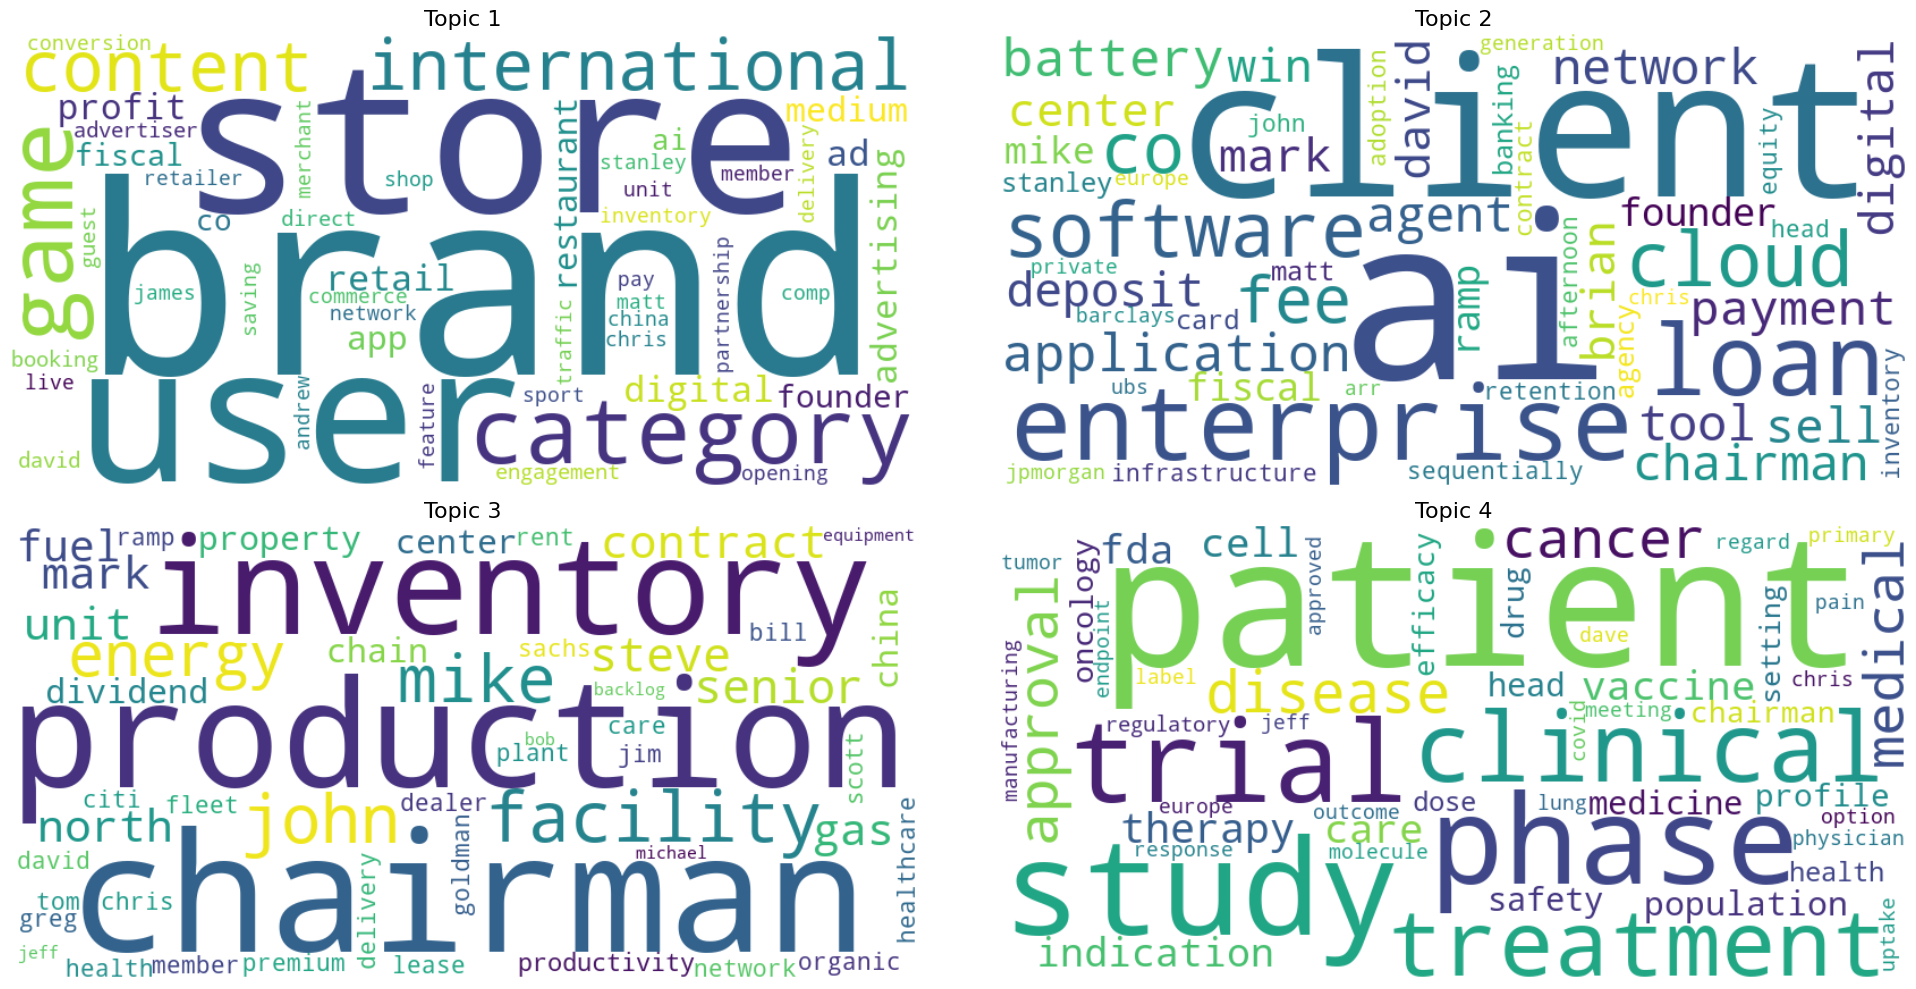

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(lda_model, topic_num):
    # Get the topic terms and their relative weights
    terms = lda_model.show_topic(topic_num, topn=50)
    terms_dict = {term: weight for term, weight in terms}
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(terms_dict)
    
    return wordcloud

# Generate word clouds for each topic
wordclouds = [create_wordcloud(lda_model, i) for i in range(num_topics)]

# Plot the word clouds in a grid
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(wordclouds[i], interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i+1}', fontsize=16)

plt.tight_layout()
plt.show()

### 8.5.2. Sentiment analysis

Sentiment analysis is a technique used to determine the emotional tone behind a body of text. It helps identify and extract subjective information from text data, such as opinions, attitudes, and emotions. 

It is commonly used in applications like customer feedback analysis, social media monitoring, and market research.

In [62]:
pip install vaderSentiment

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sample_text = "Our quarter was so amazing! We exceeded our revenue targets and launched two new products."
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(sample_text)
print(f"Text: {sample_text}...")  # Print first 100 characters for context
print(f"Sentiment: {sentiment}\n")

sample_text = "Our quarter was disappointing. We missed our revenue targets and had to delay our product launch."
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(sample_text)
print(f"Text: {sample_text}...")  # Print first 100 characters for context
print(f"Sentiment: {sentiment}\n")


Text: Our quarter was so amazing! We exceeded our revenue targets and launched two new products....
Sentiment: {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.7689}

Text: Our quarter was disappointing. We missed our revenue targets and had to delay our product launch....
Sentiment: {'neg': 0.372, 'neu': 0.628, 'pos': 0.0, 'compound': -0.7717}



## IN-CLASS: 
Using `SentimentIntensityAnalyzer`, measure the sentiment of a text of your choice.

The SentimentIntensityAnalyzer from the vaderSentiment library is a lexicon and rule-based tool designed to extract sentiment from text, especially social media content. It uses a predefined lexicon where words are assigned sentiment scores ranging from -4 (most negative) to +4 (most positive). The algorithm processes text by tokenizing it into individual words, accounting for punctuation and capitalization to modify sentiment intensity. For instance, exclamation points can amplify sentiment, and words in all caps are considered more intense.

The algorithm also applies heuristics, such as negation handling, where negating words like "not" flip the sentiment of subsequent words, and intensity modifiers like "very" adjust sentiment scores. Conjunctions such as "but" affect sentiment by introducing contrast. It aggregates these scores into a composite "compound score," which is normalized between -1 and +1 to indicate overall sentiment. Additionally, it provides individual scores for positive, neutral, and negative sentiments, representing the proportion of text that falls into each category. This comprehensive approach ensures a nuanced analysis of text sentiment.

In [104]:
for text in texts[0:10]:
    sentiment = analyzer.polarity_scores(text)
    print(f"Text: {text[1500:2000]}...")  # Print first 100 characters for context
    print(f"Sentiment: {sentiment}\n")

Text: nt's current beliefs, assumptions and expectations and are subject to a number of factors that may cause actual results to differ materially from those statements. Information concerning these factors is included in Conduent's annual report on Form 10-K filed with the SEC. We do not intend to update these forward-looking statements as a result of new information, or future events or developments, except as required by law. The information presented today includes non-GAAP financial measures. Bec...
Sentiment: {'neg': 0.022, 'neu': 0.855, 'pos': 0.123, 'compound': 1.0}

Text: he sufficiency of Geron's financial resources, and other statements that are not historical facts.Actual events or results could differ materially. Therefore, I refer you to the discussion under the heading Risk Factors in Geron's most recent periodic report filed with the SEC, which identifies important factors that could cause actual results to differ materially from those contained in the forward-looking s

## 8.6. Text embeddings

Text embeddings are a way to convert text data into numerical vectors that capture the semantic meaning of the text. These vectors can be used in various natural language processing (NLP) tasks such as text classification, sentiment analysis, and information retrieval. Embeddings transform words, phrases, or entire documents into high-dimensional space where similar texts are closer together, making it easier for algorithms to process and analyze the data.

Let's walk through an example of generating text embeddings using OpenAI's API and the tiktoken library. This example demonstrates how to read an API key from a file, tokenize the input text, truncate it to fit within the model's token limit, and then generate the embeddings.

In [105]:
%pip install openai
%pip install tiktoken

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [79]:
# Read my_key from a file:
import openai
import tiktoken

with open('openai_key.txt', 'r') as file:
    my_key = file.read()

client = openai.OpenAI(api_key=my_key)

def get_text_embeddings(text):
    text = text.replace("\n", " ")
    tokenizer = tiktoken.get_encoding("cl100k_base")
    tokens = tokenizer.encode(text)
    max_tokens = 8192
    truncated_tokens = tokens[:max_tokens]
    truncated_text = tokenizer.decode(truncated_tokens)
    return client.embeddings.create(input = [truncated_text], model="text-embedding-3-small").data[0].embedding

get_text_embeddings("The quick brown fox jumps over the lazy dog.")


[-0.018420802429318428,
 -0.007212277036160231,
 0.0036315114703029394,
 -0.05419674143195152,
 -0.022696154192090034,
 0.037019215524196625,
 0.029052091762423515,
 0.02385062538087368,
 0.01124024111777544,
 -0.020628252997994423,
 -0.013396946713328362,
 0.009083535522222519,
 -0.022620033472776413,
 0.03544608876109123,
 -0.0161245446652174,
 0.00912159588187933,
 -0.011703298427164555,
 -0.05622658133506775,
 -0.030625218525528908,
 -0.02179541252553463,
 -0.01830662414431572,
 -0.0004828800156246871,
 0.001953721512109041,
 -0.0014359535416588187,
 -0.0006371003109961748,
 -0.008817119523882866,
 0.006485974416136742,
 -0.031284917145967484,
 0.008506299927830696,
 -0.002183664357289672,
 0.03344162181019783,
 -0.029432686045765877,
 -0.011310016736388206,
 -0.06470116227865219,
 -0.010992854833602905,
 -0.03250281885266304,
 -0.039886362850666046,
 -0.012642099522054195,
 -0.02211257442831993,
 -0.00900107342749834,
 0.0008182794554159045,
 -0.061656404286623,
 0.034507285803556

We can then capture the embeddings for all texts in my corpus.

In [96]:
# Get text embeddings for the all the transcripts:
texts = [text[0] for text in transcripts['text']]
embeddings = [get_text_embeddings(text) for text in texts]

The following code shows how to use K-Means clustering to group text data based on their embeddings. By clustering the embeddings, we can identify patterns and similarities in the text, which can be useful for various applications like topic modeling, document organization, and anomaly detection.

In [100]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model
kmeans.fit(embeddings)

# Get cluster labels
labels = kmeans.labels_

transcripts['cluster'] = labels
transcripts = transcripts[['year', 'quarter', 'ticker', 'firm_name', 'cluster', 'text']]